In [50]:
import torch
import torchvision
import torchvision.transforms as transforms
from scipy.fftpack import dct, idct
import cv2

In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images

sample_at = 5
k = int(np.floor(sample_at/batch_size))

my_sample = next(itertools.islice(dataloader, k, None))
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

NameError: name 'itertools' is not defined

In [111]:
# 2D DCT
def dct2(a):
    '''
    a: 2-dimensional matrix
    '''
    return dct(dct(a, norm='ortho', type=2, axis=0), norm='ortho', type=2, axis=1)

# 2D IDCT
def idct2(a):
    return idct(idct(a, norm='ortho', type=2, axis=0), norm='ortho', type=2, axis=1) 

def DCT_encoder(data,T):
    dataDCT = dct2(data)
#     tmp = np.zeros_like(data)
#     tmp[0:T,0:T] = dataDCT[0:T,0:T]
    return dataDCT[0:T,0:T]

def DCT_decoder(data,m,n):
    # m: height of preimage
    # n: width of preimage
    tmp = np.zeros((m,n))
    tmp[0:data.shape[0],0:data.shape[1]] = data
    return idct2(tmp)

def dctt(data_batch):
    # convert images tensor batch to DCT tensor batch
    T = 28
    data = data_batch.numpy() / 2 + 0.5 # unnormalize
    
    
    d1 = data[0][0]
    d2 = data[1][0]
    d3 = data[2][0]
    d4 = data[3][0]
    
    d = np.stack((DCT_encoder(d1,T).reshape(1,T**2),DCT_encoder(d2,T).reshape(1,T**2),DCT_encoder(d3,T).reshape(1,T**2),DCT_encoder(d4,T).reshape(1,T**2)),axis=0)
    
    return torch.from_numpy(d)

In [223]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [224]:
d = dctt(images)

# CNN

In [58]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)  
        output = self.out(x)
        return output, x    # return x for visualization

In [203]:
cnn = CNN()

In [204]:
loss_func = nn.CrossEntropyLoss()

In [205]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [206]:
from torch.autograd import Variable
num_epochs = 1
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, 15000, loss.item()))
                pass
        
        pass
    
    
    pass

In [207]:
train(num_epochs, cnn, trainloader)

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [1700/15000], Loss: 0.0861
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [2100/15000], Loss: 0.3499
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [2500/15000], Loss: 0.0020
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [2900/15000], Loss: 1.0422
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [4600/15000], Loss: 0.3319
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [5000/15000], Loss: 0.0000
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [5400/15000], Loss: 0.4716
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
Epoch [1/1], Step [5800/15000], Loss: 1.7959
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


KeyboardInterrupt: 

In [53]:
def test(model):
    # Test the model
    model.eval()
    with torch.no_grad():
#         correct = 0
        total = []
        label_set = []
        for images, labels in testloader:
            test_output, last_layer = model(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            total.append(pred_y.numpy())
            label_set.append(labels.numpy())
#             accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
#         print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    total = np.array(total).reshape(10000)
    labels = np.array(label_set).reshape(10000)
    same = (total == labels).sum()
    print(f'Test Accuracy of the model on the 10000 test images: {same/100}%')

In [81]:
sample = next(iter(testloader))
imgs, lbls = sample
actual_number = lbls[:10].numpy()

test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 2 1 0]
Actual number: [7 2 1 0]


In [65]:
PATH = '/Users/gorden_wang/Desktop/CompresionTraining/model/cnn_2_epochs.pt'

In [ ]:
torch.save(cnn, PATH)

In [66]:
model = torch.load(PATH)

In [67]:
test(model)

Test Accuracy of the model on the 10000 test images: 91.93%


# DCT based MLP

In [51]:
import torch.nn as nn

class DMLP(nn.Module):
    def __init__(self):
        super(DMLP, self).__init__()
        self.linear = nn.Sequential(         
            nn.Linear(196,32),                              
            nn.ReLU(),                      
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,10),
        )
        
    def processor(self, data_batch):
        print(1)
    def forward(self, x):
        x = self.linear(x)
        output = x.view(x.size(0), -1)
        return output, x    # return x for visualization
    

In [114]:
import torch.nn as nn

class DMLP_new(nn.Module):
    def __init__(self):
        super(DMLP_new, self).__init__()
        self.linear = nn.Sequential(         
            nn.Linear(784,392),                              
            nn.ReLU(),                      
            nn.Linear(392,196),
            nn.ReLU(),
            nn.Linear(196,10),
        )
        
    def processor(self, data_batch):
        print(1)
    def forward(self, x):
        x = self.linear(x)
        output = x.view(x.size(0), -1)
        return output, x    # return x for visualization
    

In [115]:
# dmlp = DMLP()
dmlp = DMLP_new()

In [116]:
loss_func = nn.CrossEntropyLoss()

In [117]:
from torch import optim
optimizer = optim.Adam(dmlp.parameters(), lr = 0.01)

In [119]:
from torch.autograd import Variable
num_epochs = 5
def train(num_epochs, dmlp, loaders):
    
    dmlp.train()
        
    # Train the model
    for epoch in range(num_epochs):
        for i, (images_batch, labels) in enumerate(loaders):
            DCT_batch = dctt(images_batch)
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(DCT_batch.type(torch.FloatTensor))   # batch x
            b_y = Variable(labels)   # batch y
            output = dmlp(b_x)[0]             
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, 15000, loss.item()))
            

In [120]:
train(num_epochs,dmlp,trainloader)

Epoch [1/5], Step [100/15000], Loss: 1.7682
Epoch [1/5], Step [200/15000], Loss: 0.3358
Epoch [1/5], Step [300/15000], Loss: 1.1557
Epoch [1/5], Step [400/15000], Loss: 0.7437
Epoch [1/5], Step [500/15000], Loss: 1.8427
Epoch [1/5], Step [600/15000], Loss: 0.0777
Epoch [1/5], Step [700/15000], Loss: 0.4694
Epoch [1/5], Step [800/15000], Loss: 0.8954
Epoch [1/5], Step [900/15000], Loss: 3.2723
Epoch [1/5], Step [1000/15000], Loss: 0.3533
Epoch [1/5], Step [1100/15000], Loss: 0.6762
Epoch [1/5], Step [1200/15000], Loss: 0.0013
Epoch [1/5], Step [1300/15000], Loss: 0.0009
Epoch [1/5], Step [1400/15000], Loss: 0.0767
Epoch [1/5], Step [1500/15000], Loss: 0.5178
Epoch [1/5], Step [1600/15000], Loss: 0.7860
Epoch [1/5], Step [1700/15000], Loss: 1.6293
Epoch [1/5], Step [1800/15000], Loss: 0.5223
Epoch [1/5], Step [1900/15000], Loss: 2.3959
Epoch [1/5], Step [2000/15000], Loss: 0.0539
Epoch [1/5], Step [2100/15000], Loss: 0.4950
Epoch [1/5], Step [2200/15000], Loss: 0.1209
Epoch [1/5], Step [

Epoch [2/5], Step [3300/15000], Loss: 0.5107
Epoch [2/5], Step [3400/15000], Loss: 0.5389
Epoch [2/5], Step [3500/15000], Loss: 0.5203
Epoch [2/5], Step [3600/15000], Loss: 0.0000
Epoch [2/5], Step [3700/15000], Loss: 0.2220
Epoch [2/5], Step [3800/15000], Loss: 0.4676
Epoch [2/5], Step [3900/15000], Loss: 0.6794
Epoch [2/5], Step [4000/15000], Loss: 0.0025
Epoch [2/5], Step [4100/15000], Loss: 0.0000
Epoch [2/5], Step [4200/15000], Loss: 0.7320
Epoch [2/5], Step [4300/15000], Loss: 0.5174
Epoch [2/5], Step [4400/15000], Loss: 0.0001
Epoch [2/5], Step [4500/15000], Loss: 1.1763
Epoch [2/5], Step [4600/15000], Loss: 0.0006
Epoch [2/5], Step [4700/15000], Loss: 0.5852
Epoch [2/5], Step [4800/15000], Loss: 0.0001
Epoch [2/5], Step [4900/15000], Loss: 0.4423
Epoch [2/5], Step [5000/15000], Loss: 0.6438
Epoch [2/5], Step [5100/15000], Loss: 0.5115
Epoch [2/5], Step [5200/15000], Loss: 0.5135
Epoch [2/5], Step [5300/15000], Loss: 0.0085
Epoch [2/5], Step [5400/15000], Loss: 5.6148
Epoch [2/5

Epoch [3/5], Step [6500/15000], Loss: 0.0000
Epoch [3/5], Step [6600/15000], Loss: 0.0000
Epoch [3/5], Step [6700/15000], Loss: 0.4168
Epoch [3/5], Step [6800/15000], Loss: 0.0000
Epoch [3/5], Step [6900/15000], Loss: 0.5777
Epoch [3/5], Step [7000/15000], Loss: 0.0000
Epoch [3/5], Step [7100/15000], Loss: 0.5738
Epoch [3/5], Step [7200/15000], Loss: 2.2532
Epoch [3/5], Step [7300/15000], Loss: 1.6621
Epoch [3/5], Step [7400/15000], Loss: 0.0001
Epoch [3/5], Step [7500/15000], Loss: 0.6052
Epoch [3/5], Step [7600/15000], Loss: 1.1044
Epoch [3/5], Step [7700/15000], Loss: 1.1123
Epoch [3/5], Step [7800/15000], Loss: 0.7119
Epoch [3/5], Step [7900/15000], Loss: 0.5724
Epoch [3/5], Step [8000/15000], Loss: 1.0400
Epoch [3/5], Step [8100/15000], Loss: 0.0035
Epoch [3/5], Step [8200/15000], Loss: 0.5119
Epoch [3/5], Step [8300/15000], Loss: 1.2105
Epoch [3/5], Step [8400/15000], Loss: 0.0000
Epoch [3/5], Step [8500/15000], Loss: 0.0126
Epoch [3/5], Step [8600/15000], Loss: 0.3957
Epoch [3/5

Epoch [4/5], Step [9700/15000], Loss: 1.0662
Epoch [4/5], Step [9800/15000], Loss: 0.7794
Epoch [4/5], Step [9900/15000], Loss: 0.4698
Epoch [4/5], Step [10000/15000], Loss: 0.4261
Epoch [4/5], Step [10100/15000], Loss: 0.0448
Epoch [4/5], Step [10200/15000], Loss: 1.4680
Epoch [4/5], Step [10300/15000], Loss: 0.6129
Epoch [4/5], Step [10400/15000], Loss: 1.7428
Epoch [4/5], Step [10500/15000], Loss: 0.0000
Epoch [4/5], Step [10600/15000], Loss: 1.1616
Epoch [4/5], Step [10700/15000], Loss: 0.5642
Epoch [4/5], Step [10800/15000], Loss: 0.0000
Epoch [4/5], Step [10900/15000], Loss: 0.0000
Epoch [4/5], Step [11000/15000], Loss: 0.0000
Epoch [4/5], Step [11100/15000], Loss: 1.2150
Epoch [4/5], Step [11200/15000], Loss: 1.1819
Epoch [4/5], Step [11300/15000], Loss: 0.0000
Epoch [4/5], Step [11400/15000], Loss: 0.0000
Epoch [4/5], Step [11500/15000], Loss: 0.5184
Epoch [4/5], Step [11600/15000], Loss: 0.0000
Epoch [4/5], Step [11700/15000], Loss: 0.6418
Epoch [4/5], Step [11800/15000], Loss

Epoch [5/5], Step [12800/15000], Loss: 0.0048
Epoch [5/5], Step [12900/15000], Loss: 0.6503
Epoch [5/5], Step [13000/15000], Loss: 0.5415
Epoch [5/5], Step [13100/15000], Loss: 1.0496
Epoch [5/5], Step [13200/15000], Loss: 0.6784
Epoch [5/5], Step [13300/15000], Loss: 1.1495
Epoch [5/5], Step [13400/15000], Loss: 0.0000
Epoch [5/5], Step [13500/15000], Loss: 1.3643
Epoch [5/5], Step [13600/15000], Loss: 0.5650
Epoch [5/5], Step [13700/15000], Loss: 0.6844
Epoch [5/5], Step [13800/15000], Loss: 0.0000
Epoch [5/5], Step [13900/15000], Loss: 0.5767
Epoch [5/5], Step [14000/15000], Loss: 0.4248
Epoch [5/5], Step [14100/15000], Loss: 0.5663
Epoch [5/5], Step [14200/15000], Loss: 0.5787
Epoch [5/5], Step [14300/15000], Loss: 0.5460
Epoch [5/5], Step [14400/15000], Loss: 0.5928
Epoch [5/5], Step [14500/15000], Loss: 0.3749
Epoch [5/5], Step [14600/15000], Loss: 0.0000
Epoch [5/5], Step [14700/15000], Loss: 0.4423
Epoch [5/5], Step [14800/15000], Loss: 0.4153
Epoch [5/5], Step [14900/15000], L

In [122]:
def test():
    # Test the model
    dmlp.eval()
    with torch.no_grad():
#         correct = 0
        total = []
        label_set = []
        for images, labels in testloader:
            DCT_batch = dctt(images)
            test_output, last_layer = dmlp(DCT_batch)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            total.append(pred_y.numpy())
            label_set.append(labels.numpy())
#             accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
#         print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    total = np.array(total).reshape(10000)
    labels = np.array(label_set).reshape(10000)
    same = (total == labels).sum()
    print(f'Test Accuracy of the model on the 10000 test images: {same/100}%')


In [123]:
test()

Test Accuracy of the model on the 10000 test images: 78.16%


In [303]:
sample = next(iter(testloader))
imgs, lbls = sample
actual_number = lbls[:10].numpy()

test_output, last_layer = dmlp(dctt(imgs[:10]))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 2 1 0]
Actual number: [7 2 1 0]


# Cluster

In [128]:
def test():
    total = []
    labels_set = []
    images_set = []
    for images, labels in testloader:
        DCT_batch = dctt(images)
        images_set.append(images.numpy())
        total.append(DCT_batch.numpy())
        labels_set.append(labels.numpy())
        
    total = np.array(total).reshape(10000,784)
    labels = np.array(labels_set).reshape(10000)
    images = np.array(images_set).reshape(10000,28,28)
    return [total, labels, images]


In [13]:
import numpy as np

In [134]:
total, labels, images = test()

9


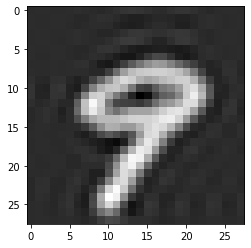

In [78]:
i = 9
plt.imshow(DCT_decoder(total[i].reshape(14,14),28,28),cmap='gray')
print(labels[i])

9


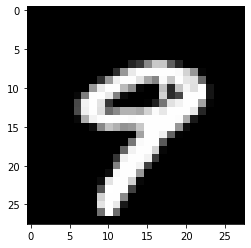

In [80]:
i = 9
plt.imshow(images[i],cmap='gray')
print(labels[i])

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(total)

In [131]:
i = 10
print(kmeans.predict(total[0:100]))
print(labels[0:100])

[7 0 2 6 4 2 1 4 4 7 6 9 1 6 5 0 4 1 0 1 7 9 4 3 4 6 4 4 6 5 0 5 0 9 7 8 1
 5 0 5 5 1 1 2 5 0 5 8 4 4 9 0 3 0 4 3 4 5 4 7 4 8 1 8 7 1 9 4 0 6 1 6 8 7
 5 1 0 7 7 7 1 9 8 1 4 4 7 0 9 2 0 9 7 0 5 4 5 5 9 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [132]:
total = kmeans.predict(total)

same = (total == labels).sum()

print(same)

1168


In [52]:
dmlp = torch.load('model/DMLP_10_epochs.pt')

In [135]:
test_output, last_layer = dmlp(torch.from_numpy(total))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

In [136]:
print(pred_y[0:10])
print(labels[0:10])

[7 5 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [137]:
a = np.arange(0,10000)
diff = np.where(pred_y==labels, 0, a)
diff = diff[diff!=0]

In [138]:
print(diff)

[   1   18   20 ... 9986 9991 9999]


In [139]:
diff.shape

(2184,)

4
7


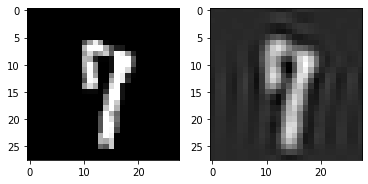

In [110]:
k = diff[140]
fig, ax = plt.subplots(1,2)
ax[0].imshow(images[k],cmap='gray')
ax[1].imshow(DCT_decoder(total[k].reshape(14,14),28,28),cmap='gray')
print(pred_y[k])
print(labels[k])

In [141]:
PATH = '/Users/gorden_wang/Desktop/CompresionTraining/model/dmlp_x28_2epochs.pt'
torch.save(dmlp,PATH)